In [2]:
%load_ext autoreload 
%autoreload 2

import os
import math
import numpy as np
import pandas as pd
from numpy import array
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi
from scipy import signal
import matplotlib.pyplot as plt

import importlib
import model as md
import view as vw

importlib.reload(md)
importlib.reload(vw)

<module 'view' from 'c:\\Users\\Артем\\Desktop\\Вуз\\Аспирантура\\Диссертация\\Алгоритм\\Relaxation_frequency_phase_algorithm\\view\\__init__.py'>

In [3]:
dir = os.getcwd()
U_path = os.path.join(dir, "data","microcap", "U.CSV")
I_path= os.path.join(dir, "data","microcap", "I.CSV")

t,U = md.make_microcap_data_list(U_path)
t,I = md.make_microcap_data_list(I_path)

In [4]:
F,V = md.get_spectrum3(t,U)

F_peak_calc = F[np.argmax(V)]
T=1/F_peak_calc

T_counts=md.convert_to_counts(t,T)
window=T_counts*9

fs = 1 / np.mean(np.diff(t)) 
vw.show_I_U_3(t,I,U,0,window)

In [5]:
t_f, U_f=md.filter_butter_bandpass(t,U,F_peak_calc,200e3,2)
t_f, I_f=md.filter_butter_bandpass(t,I,F_peak_calc,200e3,2)

#U_f=U
#I_f=I
#t_f=t

vw.show_I_U_3(t_f,I_f, U_f,0,window)

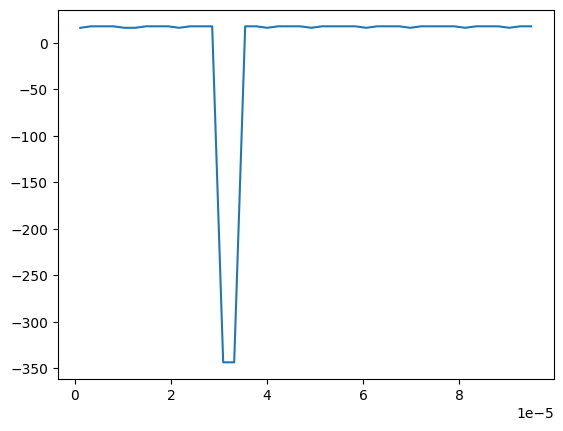

In [6]:
time_maxpoint,phase_maxpoint=md.get_phase_maxpoint_diff(t_f,U_f,I_f,F_peak_calc)

plt.plot(time_maxpoint,phase_maxpoint)

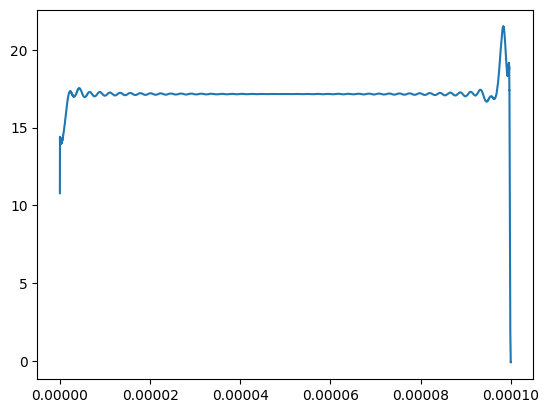

In [7]:
time_hilbert, phase_hilbert=md.get_phase_hilbert(t_f, U_f, I_f, fs)

vw.plot(time_hilbert, phase_hilbert)

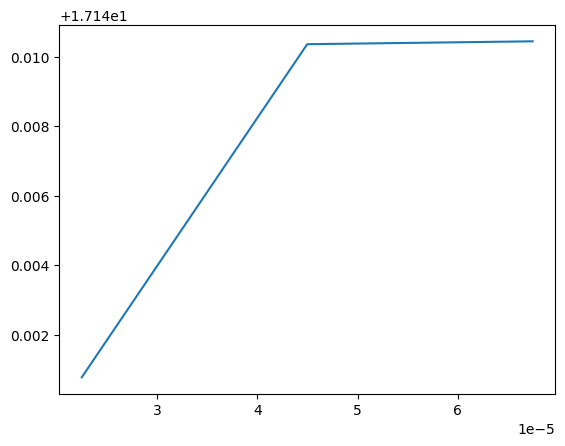

In [8]:
time_FFT, phase_FFT = md.get_phase_FFT(t_f,U_f, I_f, F_peak_calc, n_periods=20, overlap=0.5)
plt.plot(time_FFT, phase_FFT)

In [9]:
time_lockin, phase_lockin = md.get_phase_lockin(t_f,U_f, I_f, F_peak_calc,5)

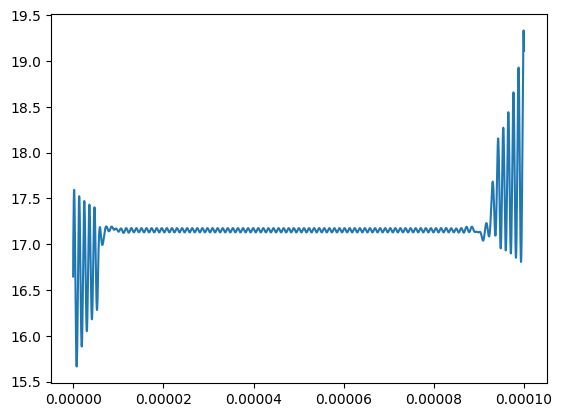

In [10]:
vw.plot(time_lockin,phase_lockin,None,40000)

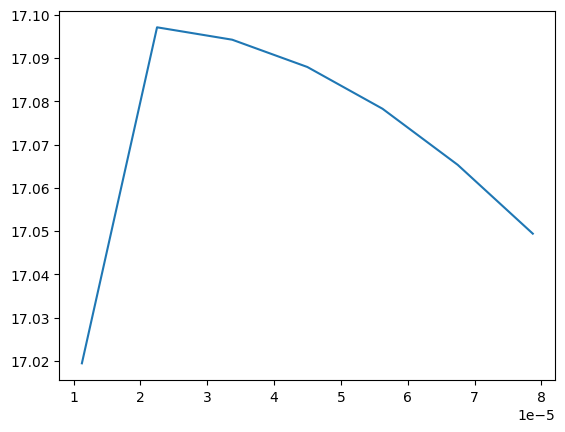

In [11]:
time_xcorr,phasse_xcorr = md.get_phase_xcorr2(t_f,U_f, I_f, F_peak_calc)
plt.plot(time_xcorr,phasse_xcorr)

In [12]:
md.print_full_stats(F_peak_calc, phase_maxpoint,phase_hilbert,phase_FFT,phase_lockin,phasse_xcorr)

Array 1: Mean phase = -0.0000, KDE mode phase = 17.2314
Array 1: Mean Frel = -5281657495643000832.0000, KDE mode Frel = 1432434.9101
Array 2: Mean phase = 17.1413, KDE mode phase = 17.1528
Array 2: Mean Frel = 1440436.1044, KDE mode Frel = 1439413.9080
Array 3: Mean phase = 17.1472, KDE mode phase = 17.1498
Array 3: Mean Frel = 1439912.9318, KDE mode Frel = 1439678.9570
Array 4: Mean phase = 17.1680, KDE mode phase = 17.1527
Array 4: Mean Frel = 1438057.8510, KDE mode Frel = 1439420.8866
Array 5: Mean phase = 17.0702, KDE mode phase = 17.0836
Array 5: Mean Frel = 1446807.6498, KDE mode Frel = 1445602.9710


In [14]:
t1=38.850e-6
t2=38.730e-6

t_d=t1-t2

deg=t_d*F_peak_calc*360

print (deg)

19.192626391385193
